<a href="https://colab.research.google.com/github/deepsyyt/PythonBasics/blob/master/Module2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Basics

These assignments aim to get you acquainted with Python, which is an important requirement for all the research done at Solarillion Foundation. Apart from teaching you Python, these assignments also aim to make you a better programmer and cultivate better coding practices.

Visit these links for more details: <br>
PEP8 Practices: https://www.python.org/dev/peps/pep-0008/ <br>
Check PEP8: http://pep8online.com <br>
Python Reference: https://www.py4e.com/lessons <br>

Do use Google efficiently, and refer to StackOverflow for clarifying any programming doubts. If you're still stuck, feel free to ask a TA to help you.

Each task in the assignment comprises of at least two cells. There are function definitions wherein you will name the function(s), and write code to solve the problem at hand. You will call the function(s) in the last cell of each task, and check your output.

We encourage you to play around and learn as much as possible, and be as creative as you can get. More than anything, have fun doing these assignments. Enjoy!

# Important
* **Only the imports and functions must be present when you upload this notebook to GitHub for verification.**
* **Do not upload it until you want to get it verified. Do not change function names or add extra cells or code, or remove anything.**
* **For your rough work and four showing your code to TAs, use a different notebook with the name Module2Playground.ipynb and copy only the final functions to this notebook for verification.**

# Module 2
Scope: NumPy, pandas, pickle, matplotlib, File operations

## Imports - Always Execute First!
Import any modules and turn on any magic here:

In [ ]:
!pip install pycodestyle_magic
!pip install pycodestyle
!pip install flake8

In [254]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle as pkl
import pandas as pd
import pickle
import random
from collections import Counter
import os
from IPython import get_ipython
ipy = get_ipython()
if ipy is not None:
    ipy.run_line_magic("load_ext", "pycodestyle_magic")
    ipy.run_line_magic("pycodestyle_on", "")
    ipy.run_line_magic("matplotlib", "inline")

## Task 1

Basics of NumPy, pandas, pickle and matplotlib.

**Question 1**

In [ ]:
"""
    Read the pickle file 'Data/Stress.pkl' and transform the contents into a
    a pandas DataFrame of the following form:

            +------+------+------+-----+------+-------+
            | ACCx | ACCy | ACCz | ECG | RESP | LABEL |
            +------+------+------+-----+------+-------+
            |      |      |      |     |      |       |
            +------+------+------+-----+------+-------+
            |      |      |      |     |      |       |
            +------+------+------+-----+------+-------+
            |      |      |      |     |      |       |
            +------+------+------+-----+------+-------+

            Shape: (700, 6)

    Save this DataFrame as a CSV file.

    Modules
    -------
    pickle, pandas

    Lookups
    -------
    NumPy and pandas basics (Check the Lookups folder)
    Try to complete the tasks in the Lookups, and play around with the notebooks.
"""

In [187]:
def pickle_to_csv(filename):
    """
        Function: pickle_to_csv(filename)
        Parameters: filename (String)
        Save: DataFrame as `Stress.csv` in folder `Data`
        Return: DataFrame
    """
    # converting pickle file to pandas dataframe
    # Create an empty DataFrame
    df = pd.DataFrame()
    # Iterate through keys under 'signal'
    for key, values in filename['signal'].items():
        df[key] = values
    return df

In [188]:
# Call your function here
with open('/content/PythonBasics-master/data/Stress.pkl', 'rb') as file:
    filename = pickle.load(file)
df = pickle_to_csv(filename)
print(list(df.columns))
df.head(10)

,ACC,ECG,RESP,LABEL
0,"[0.9553999900817872, -0.22200000286102292, -0....",[0.02142333984375],[-1.14898681640625],[0.0]
1,"[0.9257999658584596, -0.2215999960899353, -0.5...",[0.02032470703125],[-1.12457275390625],[0.0]
2,"[0.9082000255584716, -0.21960002183914185, -0....",[0.0165252685546875],[-1.15203857421875],[0.0]
3,"[0.8974000215530396, -0.2102000117301941, -0.5...",[0.0167083740234375],[-1.15814208984375],[0.0]
4,"[0.888200044631958, -0.2035999894142151, -0.48...",[0.0116729736328125],[-1.16119384765625],[0.0]
5,"[0.8822000026702881, -0.19539999961853027, -0....",[0.0048980712890625],[-1.165771484375],[0.0]
6,"[0.8760000467300415, -0.1866000294685364, -0.4...",[0.0027923583984375],[-1.129150390625],[0.0]
7,"[0.8680000305175781, -0.1809999942779541, -0.3...",[0.0060882568359375],[-1.153564453125],[0.0]
8,"[0.8522000312805176, -0.17659997940063474, -0....",[0.0099334716796875],[-1.15203857421875],[0.0]
9,"[0.8334000110626221, -0.17619997262954712, -0....",[0.0103912353515625],[-1.21917724609375],[0.0]


**Question 2**

In [ ]:
"""
    Find the number of occurrences of each unique value in `LABEL` (count of values).

    Add a column `BINARY` to the DataFrame which contains 1 if `LABEL` is 2,
    else 0.

    Find the mean, minimum, maximum and standard deviation of `RESP` for each value in `LABEL`.
"""

In [189]:
def count_unique(dataframe):
    """
        Function 1: count_unique(dataframe)
        Parameters: dataframe: Stress data DataFrame
        Return: dict containing count of values in `LABEL`
    """
    # Convert lists in 'LABEL' column to tuples
    dataframe['LABEL'] = dataframe['LABEL'].apply(tuple)
    # Count occurrences of tuples in the 'LABEL' column
    unique_count = dataframe['LABEL'].value_counts()
    # Convert the index (tuples) to strings and create a dictionary
    unique_count_dict = dict(map(lambda x: (str(x), unique_count[x]), unique_count.index))
    return unique_count_dict

INFO:pycodestyle:12:80: E501 line too long (90 > 79 characters)


In [190]:
# Call your function here
count_unique(df)

{'(0.0,)': 100,
 '(1.0,)': 100,
 '(2.0,)': 100,
 '(6.0,)': 100,
 '(4.0,)': 100,
 '(3.0,)': 100,
 '(7.0,)': 100}

In [191]:
def add_binary(dataframe):
    """
        Function 2: add_binary(dataframe)
        Parameters: dataframe: Stress data DataFrame
        Return: DataFrame (updated, containing `BINARY`)
    """
    # Add a new column 'BINARY' with 1 where '2' is in the 'LABEL' list, and 0 otherwise
    dataframe['BINARY'] = dataframe['LABEL'].apply(lambda x: 1 if 2 in x else 0)
    return dataframe

INFO:pycodestyle:7:80: E501 line too long (88 > 79 characters)
INFO:pycodestyle:8:80: E501 line too long (80 > 79 characters)


In [192]:
# Call your function here
add_binary(df)

,ACC,ECG,RESP,LABEL,BINARY
0,"[0.9553999900817872, -0.22200000286102292, -0....",[0.02142333984375],[-1.14898681640625],"(0.0,)",0
1,"[0.9257999658584596, -0.2215999960899353, -0.5...",[0.02032470703125],[-1.12457275390625],"(0.0,)",0
2,"[0.9082000255584716, -0.21960002183914185, -0....",[0.0165252685546875],[-1.15203857421875],"(0.0,)",0
3,"[0.8974000215530396, -0.2102000117301941, -0.5...",[0.0167083740234375],[-1.15814208984375],"(0.0,)",0
4,"[0.888200044631958, -0.2035999894142151, -0.48...",[0.0116729736328125],[-1.16119384765625],"(0.0,)",0
...,...,...,...,...,...
695,"[0.9134000539779664, -0.13999998569488525, 0.1...",[0.00347900390625],[2.29949951171875],"(7.0,)",0
696,"[0.9091999530792236, -0.13940000534057614, 0.0...",[0.0007781982421875],[2.30560302734375],"(7.0,)",0
697,"[0.908400058746338, -0.14139997959136966, 0.09...",[-0.0016937255859375],[2.2979736328125],"(7.0,)",0
698,"[0.9115999937057496, -0.14160001277923584, 0.0...",[-0.0037994384765625],[2.35443115234375],"(7.0,)",0


In [193]:
def compute_resp(dataframe):
    """
        Function 3: compute_resp(dataframe)
        Parameters: dataframe: Stress data DataFrame
        Return: dict containing mean, min, max and standard deviation of `RESP`
                for each value in `LABEL`
        Dictionary Format: {label_value: [mean, min, max, std_dev]}
        Example: {1: [1, 0, 2, 1], 2: [0, -1, 1, 1], ... }
    """
    df = pd.DataFrame(dataframe)
    # Convert 'LABEL' to categorical for proper sorting
    df['LABEL'] = pd.Categorical(df['LABEL'])
    df_exploded = df.explode('RESP')
    # Convert 'RESP' to numeric type
    df_exploded['RESP'] = pd.to_numeric(df_exploded['RESP'], errors='coerce')
    # Group by 'LABEL' and calculate mean, min, max, and std for 'RESP'
    result = df_exploded.groupby('LABEL')['RESP'].agg(['mean', 'min', 'max', 'std'])
    return result

INFO:pycodestyle:17:80: E501 line too long (84 > 79 characters)


In [194]:
# Call your function here
compute_resp(df)

,mean,min,max,std
LABEL,,,,
"(0.0,)",-1.193420,-1.396179,-1.124573,0.042247
"(1.0,)",0.713425,-0.233459,1.191711,0.295534
"(2.0,)",-1.066513,-1.631165,-0.865173,0.128233
"(3.0,)",-0.530640,-1.271057,-0.099182,0.243975
"(4.0,)",-2.130600,-2.543640,-2.000427,0.088077
"(6.0,)",0.084747,-0.418091,0.166321,0.085615
"(7.0,)",1.190506,-0.004578,2.355957,0.693196


**Question 3**

In [ ]:
"""
    Plot `RESP` using matplotlib (pyplot):
    - First, just plot the raw values.
    - Next, try using different colours for data points based on `BINARY`.
    - Experiment and come up with a useful plot.
"""

In [213]:
def plot_raw(dataframe):
    """
        Function 1: plot_raw(dataframe)
        Parameters: dataframe: Stress data DataFrame
        Output: Plot
    """
    # Check if 'RESP' column exists in the DataFrame
    if 'RESP' not in dataframe.columns:
        raise ValueError("The 'RESP' column is not present in the DataFrame.")
    # Flatten the 'RESP' column using explode
    df_exploded = dataframe.explode('RESP')
    # Convert 'RESP' values to float
    df_exploded['RESP'] = pd.to_numeric(df_exploded['RESP'], errors='coerce')
    # Plot the raw values of 'RESP'
    plt.figure(figsize=(10, 6))
    plt.plot(df_exploded['RESP'], marker='s', linestyle='--', label='Raw Values')
    plt.title('Raw Values of RESP')
    plt.xlabel('Index')
    plt.ylabel('RESP')
    plt.legend()
    plt.show()

INFO:pycodestyle:16:80: E501 line too long (81 > 79 characters)


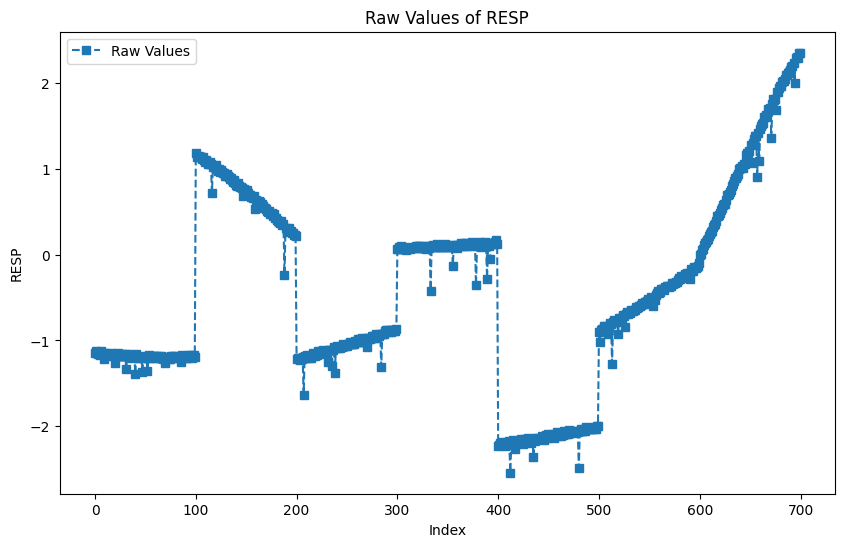

In [214]:
# Call your function here
plot_raw(df)

In [314]:
def plot_coloured(dataframe):
    """
        Function 2: plot_coloured(dataframe)
        Parameters: dataframe: Stress data DataFrame
        Output: Plot
    """
    # Check if 'RESP' and 'BINARY' columns exist in the DataFrame
    if 'RESP' not in dataframe.columns or 'BINARY' not in dataframe.columns:
        raise ValueError("Both 'RESP' and 'BINARY' columns are required in the DataFrame.")
    df_exploded = dataframe.explode('RESP')
    # Convert 'RESP' values to float
    df_exploded['RESP'] = pd.to_numeric(df_exploded['RESP'], errors='coerce')
    df_exploded['BINARY'] = pd.Categorical(df_exploded['BINARY'])
    # Plot a scatter plot with different colors and marker size
    plt.figure(figsize=(10, 6))
    # Assign colors based on 'BINARY'
    colors = df_exploded['BINARY'].map({0: 'blue', 1: 'red'})
    # Plot scatter plot
    scatter = plt.scatter(range(len(df_exploded['RESP'])), df_exploded['RESP'], c=colors, alpha=0.7, label='BINARY')
    # Create a legend based on colors
    legend_labels = df_exploded['BINARY'].unique()
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors.unique()]
    plt.legend(handles=handles, title='BINARY', labels=legend_labels)
    plt.title('Scatter Plot of RESP with Colors based on BINARY')
    plt.xlabel('Index')
    plt.ylabel('RESP')
    plt.show()

INFO:pycodestyle:9:80: E501 line too long (91 > 79 characters)
INFO:pycodestyle:19:80: E501 line too long (116 > 79 characters)
INFO:pycodestyle:22:80: E501 line too long (126 > 79 characters)


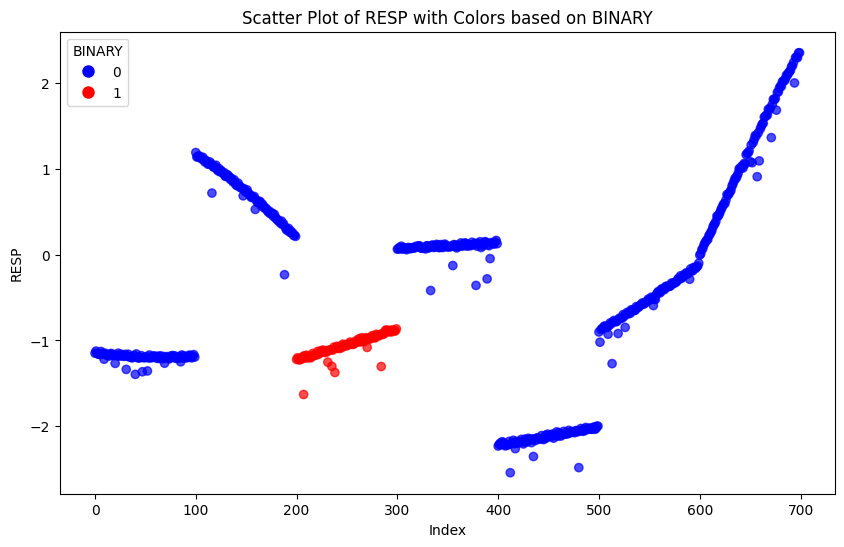

In [253]:
# Call your function here
plot_coloured(df)

## Task 2

Some simple file operations.

In [ ]:
"""
    Generate a text file containing 50 integer elements between 1 and 20 (use `random`).
    Identify the unique numbers and the number of their occurrences, and write this into
    a new text file.

    Example
    -------

    Generated File
    --------------
    1 2 3 4 3 2 1 ...

    Count File
    ----------
    1 - 2
    2 - 2
    3 - 2
    4 - 1
    ...
"""

In [299]:
def random_numbers():
    """
        Function: random_numbers()
        Save: `Numbers.txt` containing the 50 integers,
              `Count.txt` containing the count of unique integers
    """
    # Generate a list of 50 random integers between 1 and 20
    random_numbers = [random.randint(1, 20) for _ in range(50)]
    # Count occurrences of each number
    number_counts = {}
    for num in random_numbers:
        if num in number_counts:
            number_counts[num] += 1
        else:
            number_counts[num] = 1
    # Save generated numbers to a file (Numbers.txt)
    with open('Numbers.txt', 'w') as numbers_file:
        numbers_file.write(' '.join(map(str, random_numbers)))
    # Save counts to a file (Count.txt)
    with open('Count.txt', 'w') as count_file:
        for num, count in number_counts.items():
            count_file.write(f"{num} - {count}\n")

Once you're done, move on to Module 3. Great job!